In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()


In [2]:
# import the diabetes dataset from the CSV file into a new DataFrame named diabetes_df using the Pandas library in Python
diabetes_df = pd.read_csv("Diabetes.csv")


In [3]:
diabetes_df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
# calculate the statistical data using the describe function
diabetes_df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


###### DATA PRE-PROCESSING

In [6]:
#Check for missing values across the dataframe
diabetes_df.isna()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Check for duplicate records across the dataset 
duplicates = diabetes_df.duplicated()
#print the result of the check
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [8]:
# check for Null values 
diabetes_df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [4]:
# check unique values of the categorical variables

# For Gender variable
unique_genders = diabetes_df["Gender"].unique()
print("Unique genders in the dataset:", unique_genders)

Unique genders in the dataset: ['F' 'M' 'f']


In [5]:
# check unique values of the categorical variables

# For Class variable
unique_class = diabetes_df["CLASS"].unique()
print("Unique Classes in the dataset:", unique_class)

Unique Classes in the dataset: ['N' 'N ' 'P' 'Y' 'Y ']


#### PERFORM FEATURE ENGINEERING

In [6]:
# Create a copy of the 'Gender' column with 'f' replaced by 'F'
diabetes_df["gender"] = diabetes_df["Gender"].str.upper()

# Now, 'Gender_cleaned' contains the consistent gender values
unique_genders = diabetes_df["gender"].unique()
print("Unique genders in the dataset:", unique_genders)

Unique genders in the dataset: ['F' 'M']


In [7]:
# Create a copy of the 'CLASS' column with renamed values
diabetes_df["Class"] = diabetes_df["CLASS"].str.strip().replace({'N': 'Non-diabetic', 'Y': 'Diabetic', 'P': 'Pre-diabetic'})

# Now, 'CLASS_cleaned' contains the cleaned class values
unique_classes = diabetes_df["Class"].unique()
print("Unique classes in the dataset:", unique_classes)

Unique classes in the dataset: ['Non-diabetic' 'Pre-diabetic' 'Diabetic']


In [12]:
diabetes_df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,gender,Class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,F,Non-diabetic
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,M,Non-diabetic
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,F,Non-diabetic
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,F,Non-diabetic
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,M,Non-diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,M,Diabetic
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,M,Diabetic
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,M,Diabetic
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,M,Diabetic


In [8]:
# drop the uncleaned variables
Columns_to_drop = ['Gender','CLASS']
diabetes_df = diabetes_df.drop(columns = Columns_to_drop, axis = 1) 

#### EXPLORATORY DATA ANALYSIS 

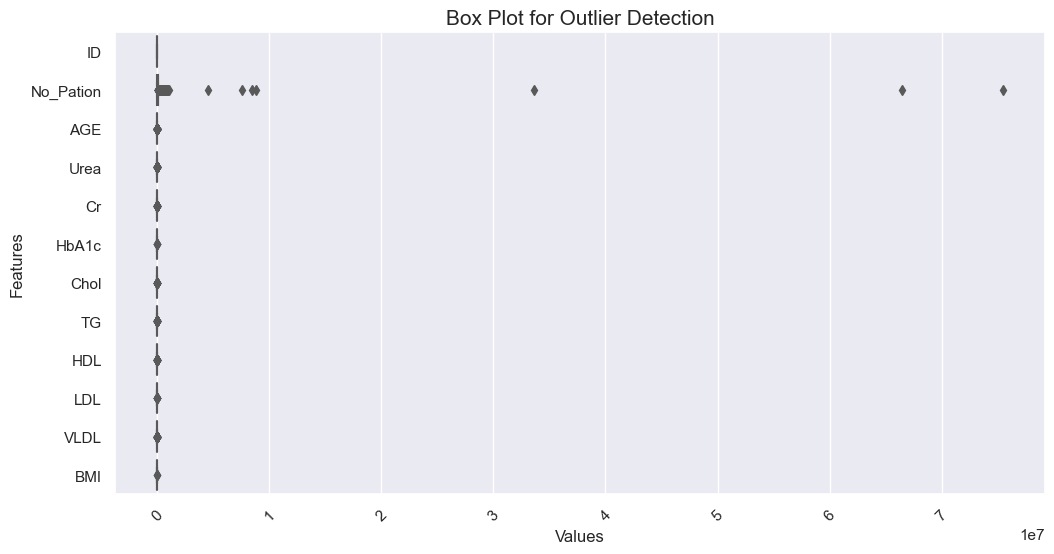

In [14]:
# Checking for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_df, orient='h', palette='Set2')
plt.xticks(rotation=45)
plt.title('Box Plot for Outlier Detection', fontsize=15)
plt.ylabel('Features', fontsize=12)
plt.xlabel('Values', fontsize=12)
plt.show()

In [9]:
#remove redundant variables
diabetes_df.drop(['No_Pation', 'ID'], axis=1, inplace=True)


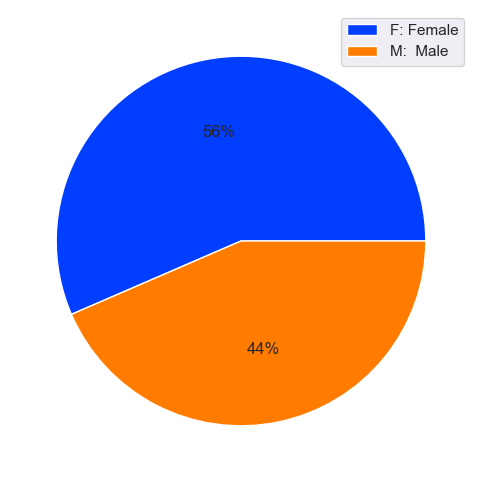

In [41]:
#Visualization of categorical values

# Create a pie chart to see gender distribution 
plt.figure(figsize=(12,6))
palette_color = sns.color_palette('bright')
plt.pie(diabetes_df['gender'].value_counts(),colors= palette_color, autopct='%.0f%%') 
plt.legend(["F: Female","M:  Male"]) 

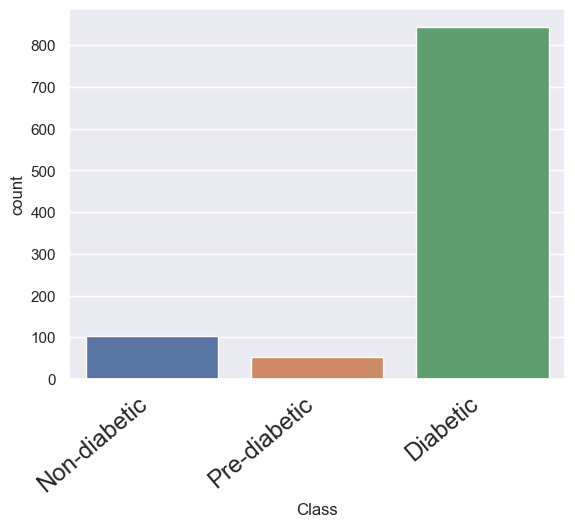

In [42]:
# Create a count plot for the 'class' attribute
class_variable = sns.countplot(data=diabetes_df, x='Class')

# Customize the x-axis labels
class_variable.set_xticklabels(class_variable.get_xticklabels(), rotation=40, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.show()

##### Numerical Variables visualization

Text(0.5, 1.0, 'Age Distribution')

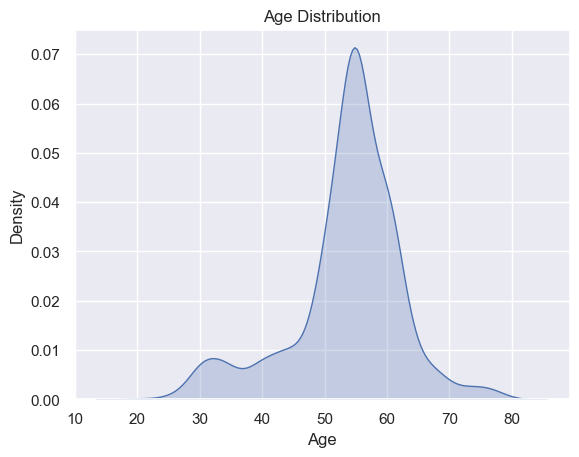

In [18]:
# Create a count plot for the 'AGE' attribute
sns.kdeplot(diabetes_df['AGE'], shade=True)
plt.xlabel('Age')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Urea Distribution')

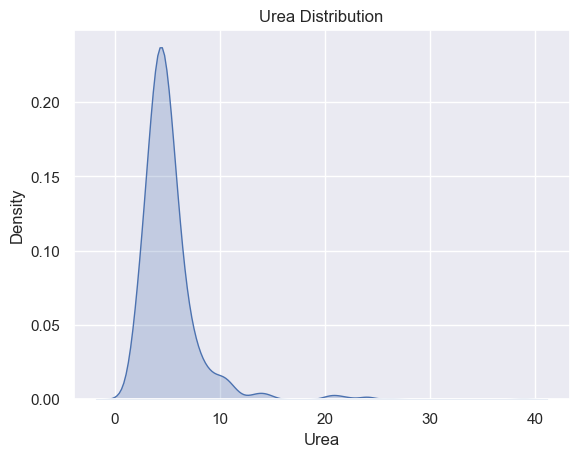

In [20]:
# Create a count plot for the 'Urea' attribute
sns.kdeplot(diabetes_df['Urea'], shade=True)
plt.xlabel('Urea')
plt.title('Urea Distribution')

Text(0.5, 1.0, 'Creatine Distribution')

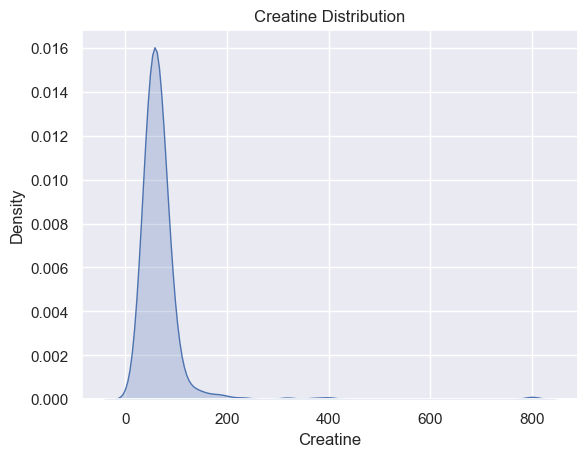

In [21]:
# Create a count plot for the 'Urea' attribute
sns.kdeplot(diabetes_df['Cr'], shade=True)
plt.xlabel('Creatine')
plt.title('Creatine Distribution')

Text(0.5, 1.0, 'Hemoglobin A1c Distribution')

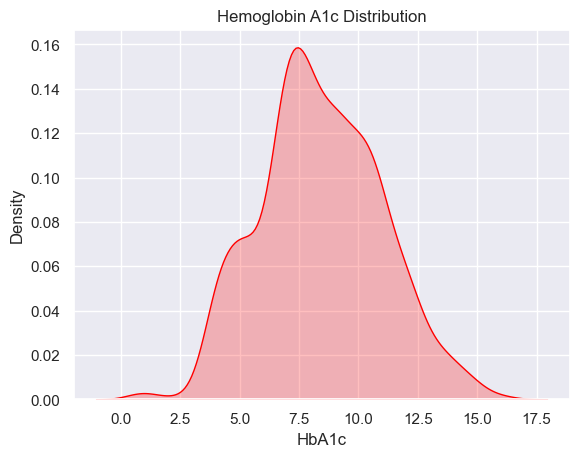

In [22]:
# Create a count plot for the 'Hemoglobin A1c' attribute
sns.kdeplot(diabetes_df['HbA1c'], shade=True, color='red')
plt.xlabel('HbA1c')
plt.title('Hemoglobin A1c Distribution')

Text(0.5, 1.0, 'Cholesterol Distribution')

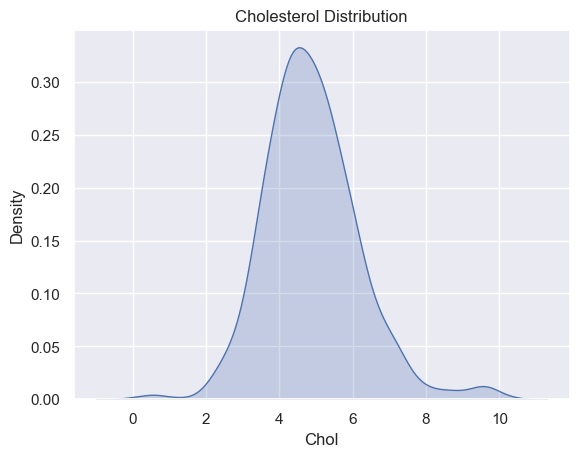

In [23]:
# Create a count plot for the 'Hemoglobin A1c' attribute
sns.kdeplot(diabetes_df['Chol'], shade=True)
plt.xlabel('Chol')
plt.title('Cholesterol Distribution')

Text(0.5, 1.0, 'Triglycerides  Distribution')

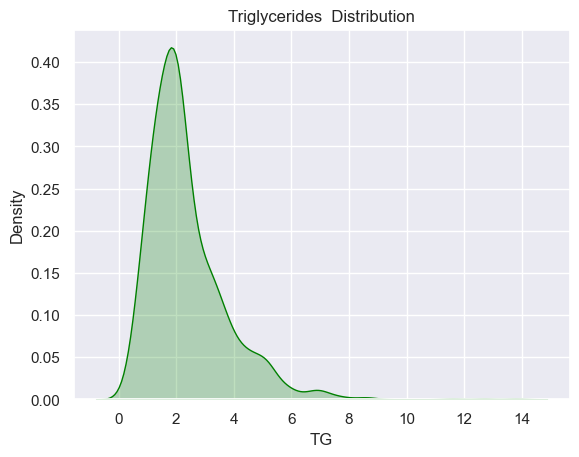

In [24]:
# Create a KDE plot for the 'Triglycerides ' attribute with a different color
sns.kdeplot(diabetes_df['TG'], shade=True, color='green')
plt.xlabel('TG')
plt.title('Triglycerides  Distribution')

Text(0.5, 1.0, 'High-Density Lipoprotein  Distribution')

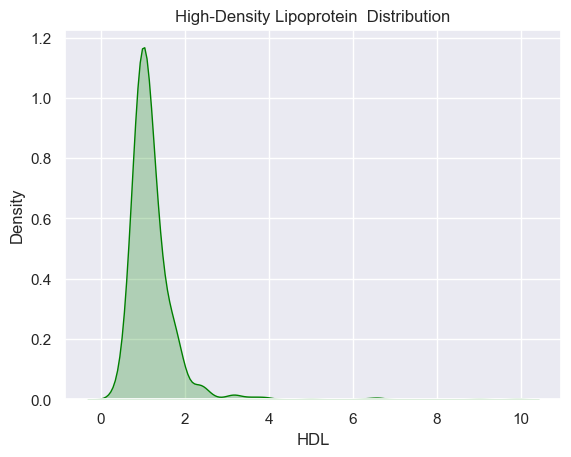

In [25]:
# Create a KDE plot for the 'High-Density Lipoprotein ' attribute with a different color
sns.kdeplot(diabetes_df['HDL'], shade=True, color='green')
plt.xlabel('HDL')
plt.title('High-Density Lipoprotein  Distribution')

Text(0.5, 1.0, 'Low-Density Lipoprotein  Distribution')

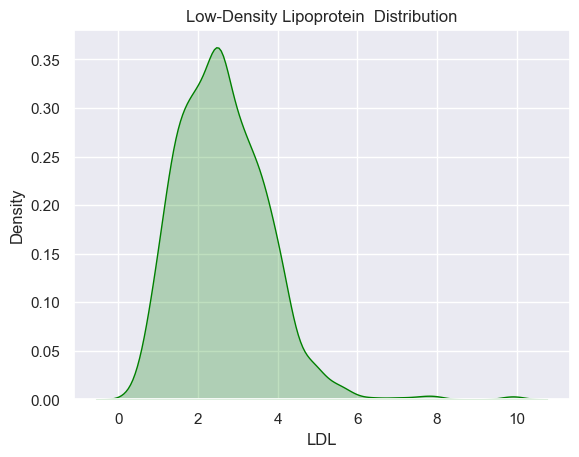

In [26]:
# Create a KDE plot for the 'Low-Density Lipoprotein ' attribute with a different color
sns.kdeplot(diabetes_df['LDL'], shade=True, color='green')
plt.xlabel('LDL')
plt.title('Low-Density Lipoprotein  Distribution')

Text(0.5, 1.0, 'Very Low-Density Lipoprotein  Distribution')

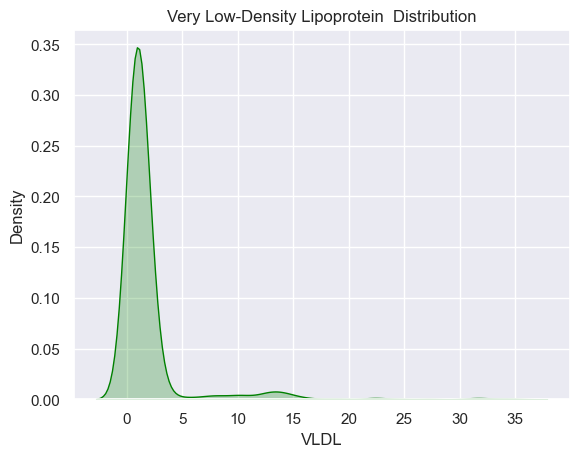

In [27]:
# Create a KDE plot for the 'Very Low-Density Lipoprotein ' attribute with a different color
sns.kdeplot(diabetes_df['VLDL'], shade=True, color='green')
plt.xlabel('VLDL')
plt.title('Very Low-Density Lipoprotein  Distribution')

Text(0.5, 1.0, 'Distribution of Body Mass Index')

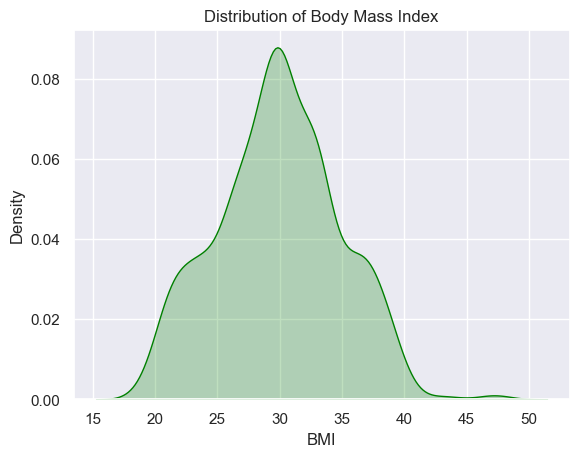

In [28]:
# Create a KDE plot for the 'Body mass index ' attribute with a different color
sns.kdeplot(diabetes_df['BMI'], shade=True, color='green')
plt.xlabel('BMI')
plt.title('Distribution of Body Mass Index')

#### Exploring relationships between variables


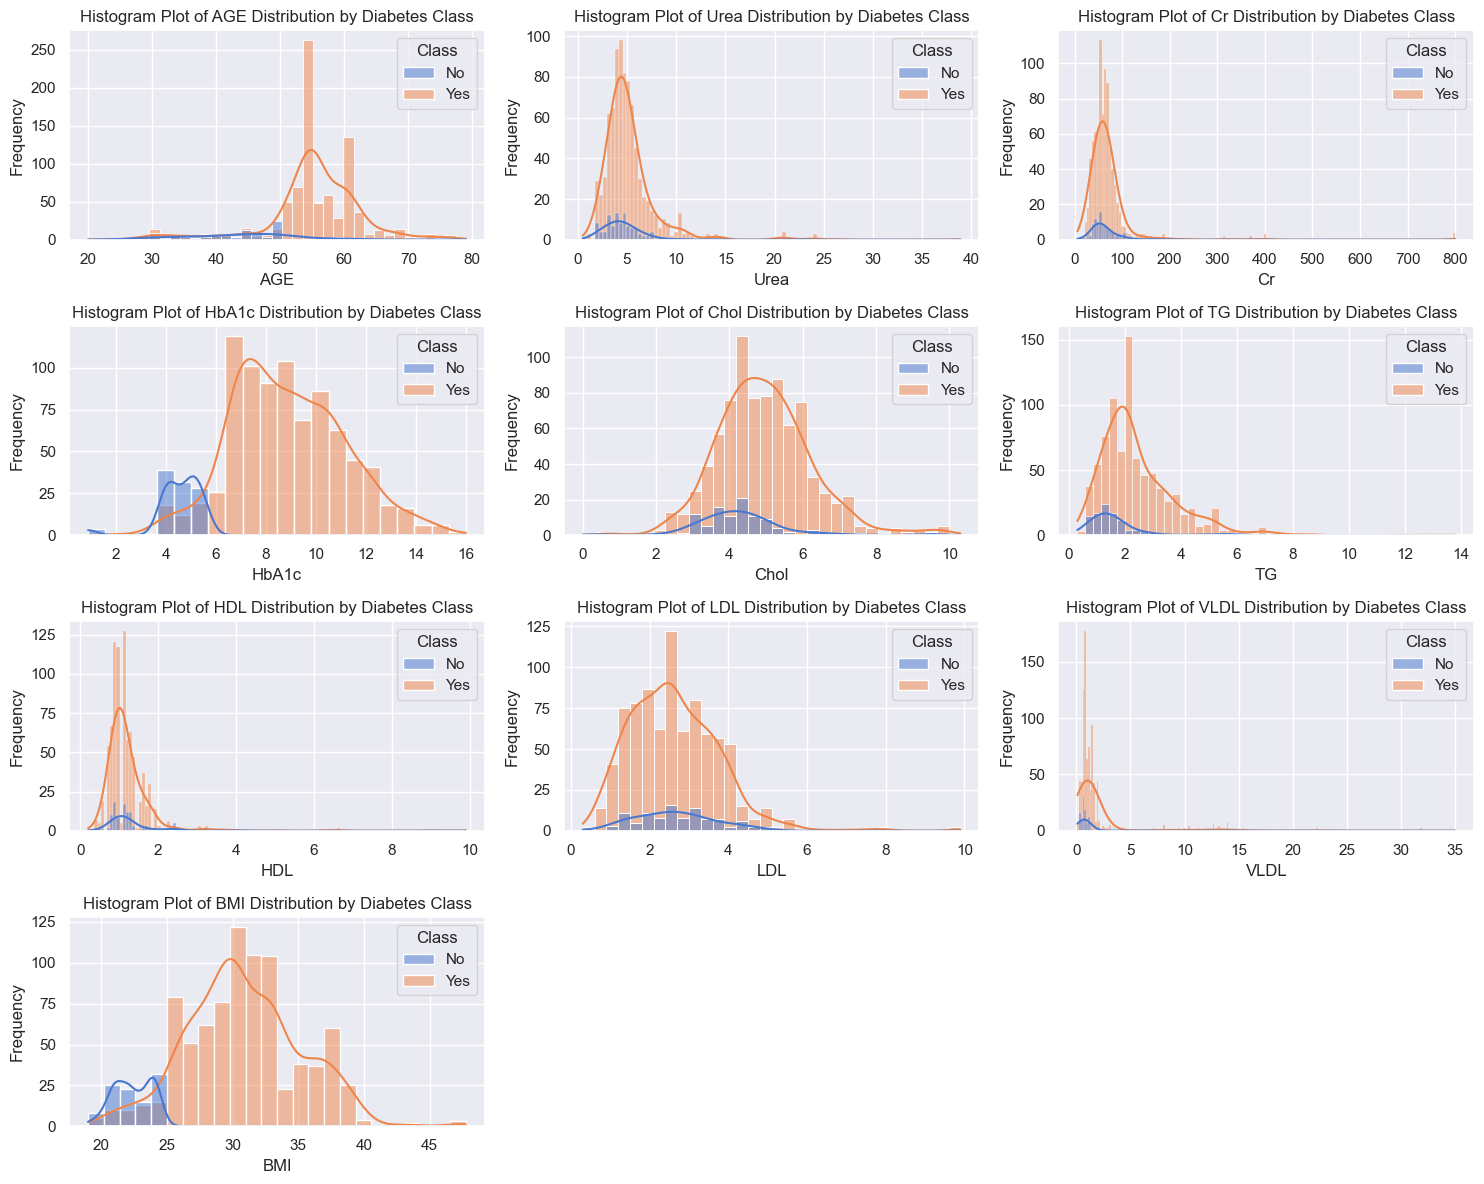

In [29]:
# List of numerical columns
numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Create histogram plots for each numerical variable
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=diabetes_df, x=column, hue='Class', kde=True, palette='muted')
    plt.title(f"Histogram Plot of {column} Distribution by Diabetes Class")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Apply Log transformation on Numerical variables

In [10]:
#define variables to transform
variables_to_transform = ['BMI', 'VLDL', 'LDL', 'HDL', 'TG', 'Chol', 'HbA1c', 'Cr', 'Urea', 'AGE']

# Apply log transformation to the specified variables
for variable in variables_to_transform:
    diabetes_df[f'{variable}_log'] = np.log(diabetes_df[variable])

#### Visualize The Tranformed Variables


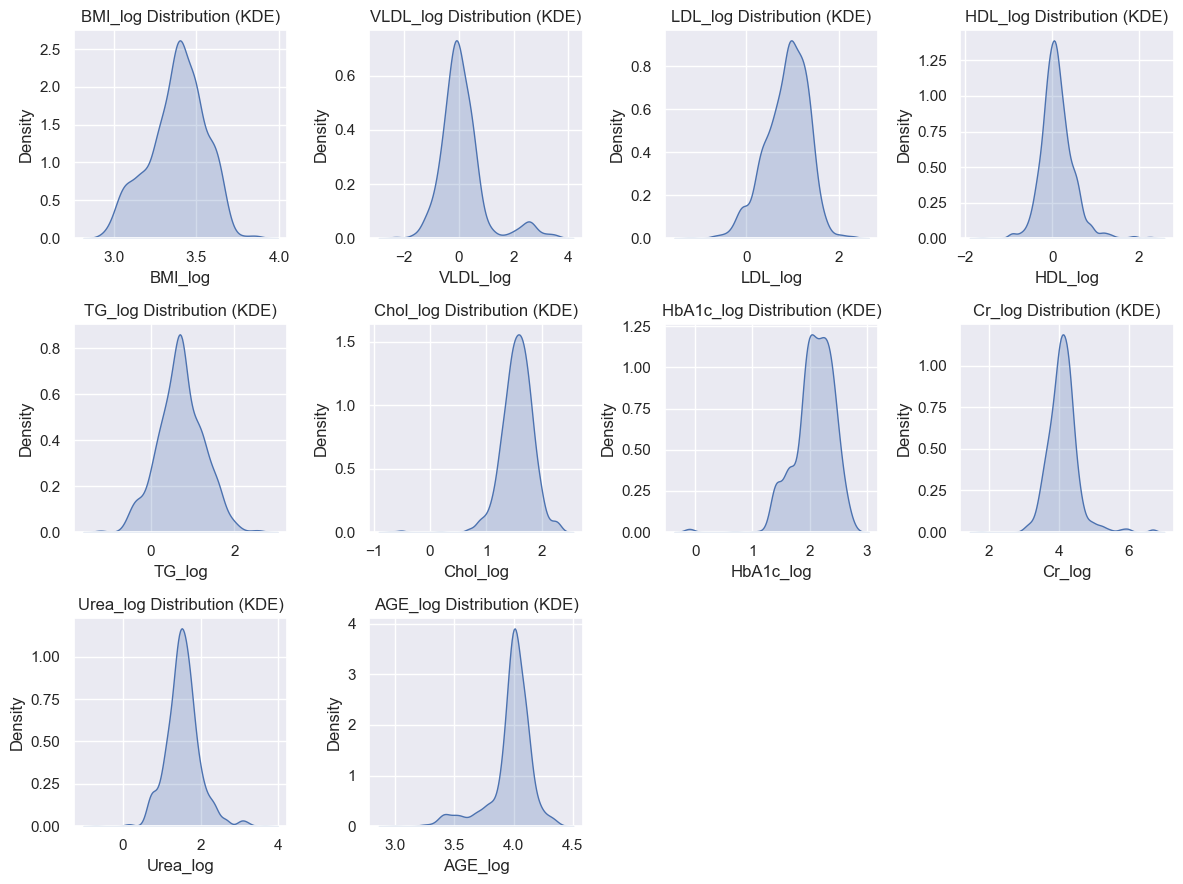

In [31]:
# List of log-transformed variables
log_transformed_variables = ['BMI_log', 'VLDL_log', 'LDL_log', 'HDL_log', 'TG_log', 'Chol_log', 'HbA1c_log', 'Cr_log', 'Urea_log', 'AGE_log']

# Create subplots for kernel density plots of log-transformed variables
plt.figure(figsize=(12, 9)) 
for i, variable in enumerate(log_transformed_variables):
    plt.subplot(3, 4, i + 1)
    sns.kdeplot(diabetes_df[variable], shade=True)
    plt.title(f'{variable} Distribution (KDE)')
plt.tight_layout()
plt.show()

#### Correlation Matrix

<AxesSubplot:>

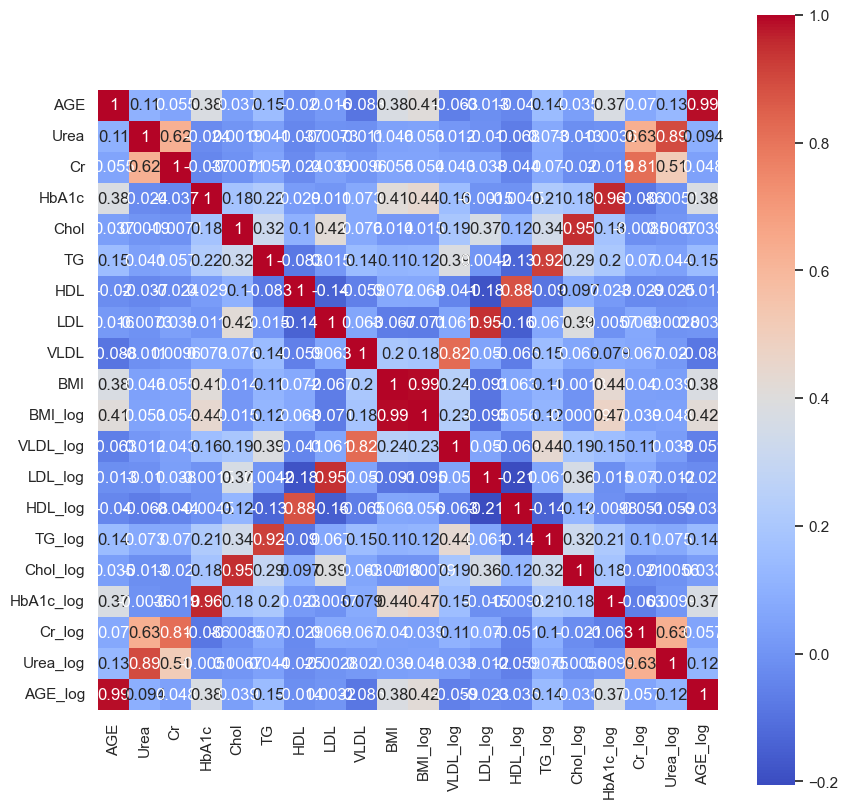

In [20]:
# check correlation for the numerical variables

correlation = diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square = True, annot = True, cmap = 'coolwarm')

#### Drop Unneccessary Columns

In [11]:
 Columns_to_drop = ['AGE','Urea','Cr', 'HbA1c', 'Chol','TG', 'HDL', 'LDL', 'VLDL', 'BMI']
diabetes_df = diabetes_df.drop(columns = Columns_to_drop, axis = 1) 

In [22]:
diabetes_df

,gender,Class,BMI_log,VLDL_log,LDL_log,HDL_log,TG_log,Chol_log,HbA1c_log,Cr_log,Urea_log,AGE_log
0,F,Non-diabetic,3.178054,-0.693147,0.336472,0.875469,-0.105361,1.435085,1.589235,3.828641,1.547563,3.912023
1,M,Non-diabetic,3.135494,-0.510826,0.741937,0.095310,0.336472,1.308333,1.589235,4.127134,1.504077,3.258097
2,F,Non-diabetic,3.178054,-0.693147,0.336472,0.875469,-0.105361,1.435085,1.589235,3.828641,1.547563,3.912023
3,F,Non-diabetic,3.178054,-0.693147,0.336472,0.875469,-0.105361,1.435085,1.589235,3.828641,1.547563,3.912023
4,M,Non-diabetic,3.044522,-0.916291,0.693147,-0.223144,0.000000,1.589235,1.589235,3.828641,1.960095,3.496508
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,Diabetic,3.401197,-0.510826,0.587787,0.182322,0.530628,2.014903,1.945910,4.574711,2.397895,4.262680
996,M,Diabetic,3.616309,2.734368,0.875469,-0.356675,0.788457,1.410987,2.509599,4.094345,1.098612,3.433987
997,M,Diabetic,3.310543,2.091864,0.875469,0.182322,0.095310,1.410987,1.902108,4.394449,1.960095,3.401197
998,M,Diabetic,3.701302,2.639057,1.064711,0.470004,0.693147,1.667707,1.902108,4.077537,1.757858,3.637586


#### Encode Categorical Variable

In [12]:
# Encoding by changing categorical value to binary
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['gender']
encoder = LabelEncoder()
for col in columns_to_encode:
    diabetes_df[col] = encoder.fit_transform(diabetes_df[col])


In [13]:
# Create a mapping dictionary
class_mapping = {
    'Non-diabetic': 0,
    'Pre-diabetic': 1,
    'Diabetic': 2
}

# Map the values using the dictionary
diabetes_df['Class'] = diabetes_df['Class'].map(class_mapping)

In [96]:
diabetes_df

,ID,No_Pation,gender,Class,BMI_log,VLDL_log,LDL_log,HDL_log,TG_log,Chol_log,HbA1c_log,Cr_log,Urea_log,AGE_log
0,502,17975,0,0,3.178054,-0.693147,0.336472,0.875469,-0.105361,1.435085,1.589235,3.828641,1.547563,3.912023
1,735,34221,1,0,3.135494,-0.510826,0.741937,0.095310,0.336472,1.308333,1.589235,4.127134,1.504077,3.258097
2,420,47975,0,0,3.178054,-0.693147,0.336472,0.875469,-0.105361,1.435085,1.589235,3.828641,1.547563,3.912023
3,680,87656,0,0,3.178054,-0.693147,0.336472,0.875469,-0.105361,1.435085,1.589235,3.828641,1.547563,3.912023
4,504,34223,1,0,3.044522,-0.916291,0.693147,-0.223144,0.000000,1.589235,1.589235,3.828641,1.960095,3.496508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,2,3.401197,-0.510826,0.587787,0.182322,0.530628,2.014903,1.945910,4.574711,2.397895,4.262680
996,671,876534,1,2,3.616309,2.734368,0.875469,-0.356675,0.788457,1.410987,2.509599,4.094345,1.098612,3.433987
997,669,87654,1,2,3.310543,2.091864,0.875469,0.182322,0.095310,1.410987,1.902108,4.394449,1.960095,3.401197
998,99,24004,1,2,3.701302,2.639057,1.064711,0.470004,0.693147,1.667707,1.902108,4.077537,1.757858,3.637586


#### CREATING INPUT FEATURES AND OUTPUT TARGET VARIABLES


In [14]:
X = diabetes_df.drop(['Class'], axis = 1)
y = diabetes_df['Class']
 

In [15]:
# Check for infinite values
print(np.isinf(X).sum())

# Check for NaN values
print(np.isnan(X).sum())

gender       0
BMI_log      0
VLDL_log     0
LDL_log      0
HDL_log      0
TG_log       0
Chol_log     1
HbA1c_log    0
Cr_log       0
Urea_log     0
AGE_log      0
dtype: int64
gender       0
BMI_log      0
VLDL_log     0
LDL_log      0
HDL_log      0
TG_log       0
Chol_log     0
HbA1c_log    0
Cr_log       0
Urea_log     0
AGE_log      0
dtype: int64


In [16]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

#### Apply Smote for balancing


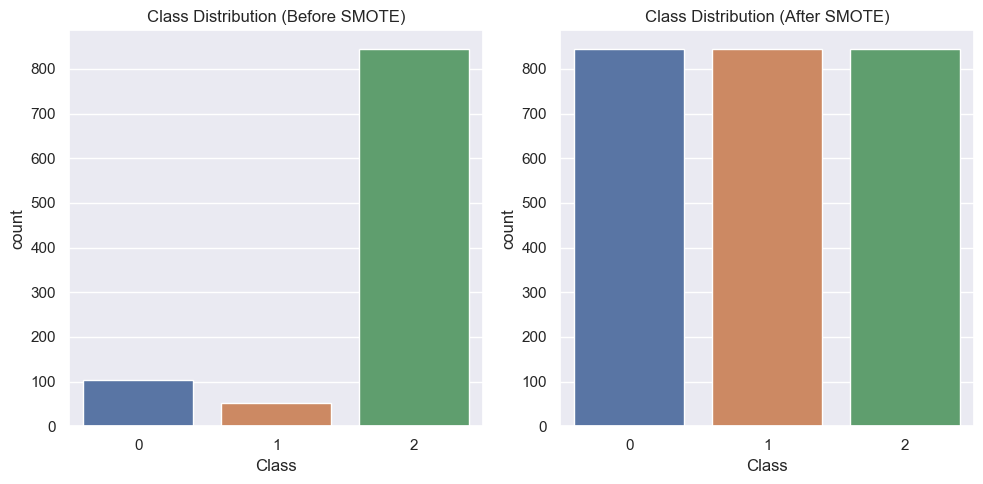

In [17]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualization before and after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Class Distribution (Before SMOTE)")

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Class Distribution (After SMOTE)")

plt.tight_layout()
plt.show()

#### FEATURE IMPORTANCE

####  Splitting Data into Test and Train


In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 42)


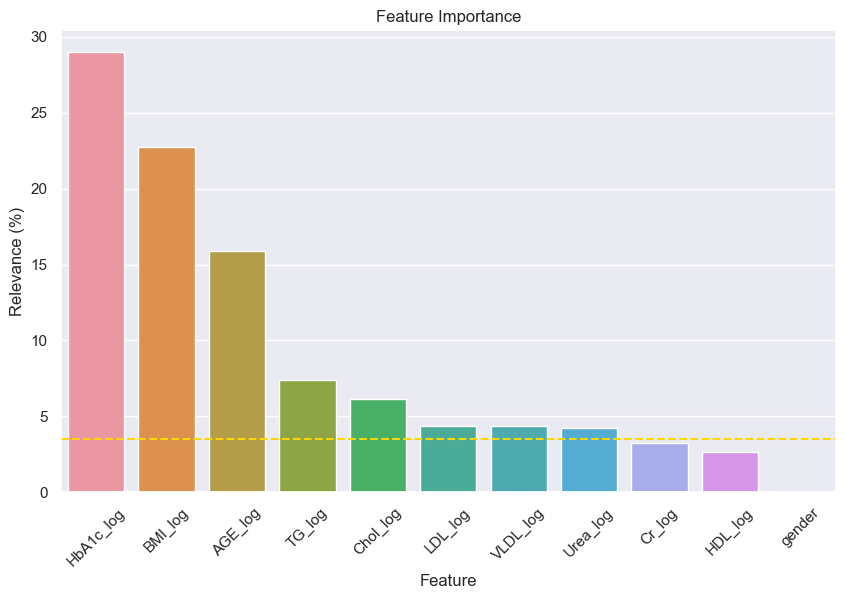

      feature  importance
0   HbA1c_log   28.972836
1     BMI_log   22.743209
2     AGE_log   15.884678
3      TG_log    7.396467
4    Chol_log    6.126254
5     LDL_log    4.398726
6    VLDL_log    4.345631
7    Urea_log    4.212774
8      Cr_log    3.251110
9     HDL_log    2.668316
10     gender    0.000000


In [19]:
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Instantiate ReliefF feature selection
Feature_selection = ReliefF()

# Train the ReliefF algorithm
Feature_selection.fit(X_train.values, y_train.values)

# Get feature importances
importances = Feature_selection.feature_importances_

# Create a DataFrame of feature importances
importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
importances_df['importance'] = importances_df['importance'] / importances.sum() * 100

# Sort features by importance
importances_df = importances_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, y='importance', x='feature')
plt.axhline(y=3.5, linestyle='--', color='gold')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.ylabel('Relevance (%)')
plt.xlabel('Feature')
plt.show()

# Display sorted feature importances
print(importances_df)


In [20]:
#drop the least important features

Columns_to_drop = ['gender','HDL_log', 'Cr_log']
diabetes_df = diabetes_df.drop(columns = Columns_to_drop, axis = 1) 

#### Constructing, Training, and Assessing Models


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

def ClassifyMetrics(model, X_test, y_test, visualize_confusion=True):
    # Perform predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(cm)
    
    # Visualize confusion matrix with a heatmap
    if visualize_confusion:
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='.2f', cmap='rainbow_r', xticklabels=['Non-diabetic', 'Pre-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Pre-diabetic', 'Diabetic'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.show()
        
    # Apply k-fold cross-validation for good validation of the model   
    kf = KFold(n_splits=3, random_state=1, shuffle=True)  
    cv_score = cross_val_score(model, X_test, y_test, cv=kf)
    print(f"{cv_score.mean() * 100:.2f}% is the Cross Validation score")

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

   
    # Return metrics as a list
    metrics_list = [
        ('Accuracy is', accuracy),
        ('Cross Validation score is', cv_score.mean() * 100),
        ('Precision is', precision),
        ('Recall is', recall),
        ('F1 Score is', f1)
    ]

    return metrics_list


#### Building Machine Learning Model

##### RANDOM FOREST CLASSIFIER


In [22]:
# Defining Random forest classifierr
RF = RandomForestClassifier(n_estimators=1000, max_features='sqrt', criterion='entropy', bootstrap=True)

# Fitting Random Forest model
RF.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       256
           1       1.00      1.00      1.00       244
           2       1.00      0.98      0.99       260

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760


Confusion Matrix:
[[256   0   0]
 [  0 244   0]
 [  5   0 255]]


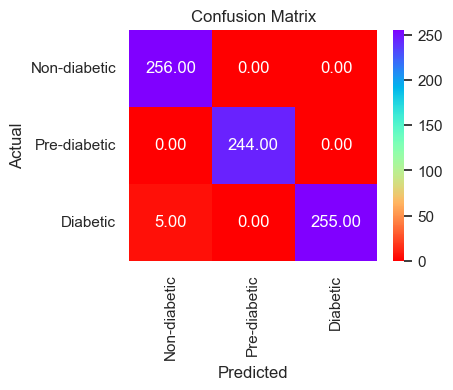

98.68% is the Cross Validation score
[('Accuracy is', 0.993421052631579), ('Cross Validation score is', 98.68351436307617), ('Precision is', 0.9935470861060697), ('Recall is', 0.993421052631579), ('F1 Score is', 0.9934209290855915)]


In [23]:
# Call ClassifyMetrics function with the appropriate arguments
metrics = ClassifyMetrics(RF, X_test, y_test)
print(metrics)

##### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Defining Logistic Regressiont classifier
LR = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting Random forest model
LR.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       256
           1       0.86      0.97      0.91       244
           2       0.96      0.90      0.93       260

    accuracy                           0.92       760
   macro avg       0.92      0.92      0.92       760
weighted avg       0.92      0.92      0.92       760


Confusion Matrix:
[[227  26   3]
 [  0 236   8]
 [ 11  14 235]]


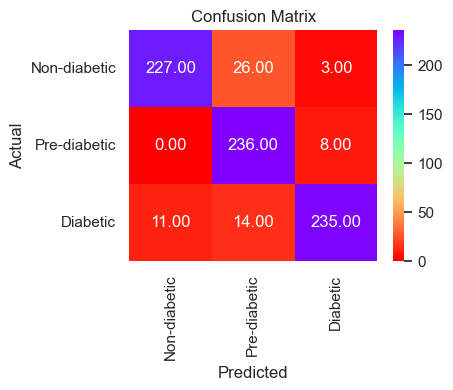

89.34% is the Cross Validation score
[('Accuracy is', 0.9184210526315789), ('Cross Validation score is', 89.34154969759214), ('Precision is', 0.9226049106923006), ('Recall is', 0.9184210526315789), ('F1 Score is', 0.9187502031871537)]


In [25]:
# Call ClassifyMetrics function with the appropriate arguments
metrics = ClassifyMetrics(LR, X_test, y_test)
print(metrics)

In [26]:
from sklearn.svm import SVC

# Defining Support vector classifier
SVC = SVC(kernel='linear', C=1, degree=1, gamma=1, probability=True)

# Fitting Random forest model
SVC.fit(X_train,y_train)


SVC(C=1, degree=1, gamma=1, kernel='linear', probability=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       256
           1       0.92      0.99      0.95       244
           2       0.99      0.92      0.95       260

    accuracy                           0.95       760
   macro avg       0.95      0.95      0.95       760
weighted avg       0.95      0.95      0.95       760


Confusion Matrix:
[[241  14   1]
 [  0 242   2]
 [ 14   8 238]]


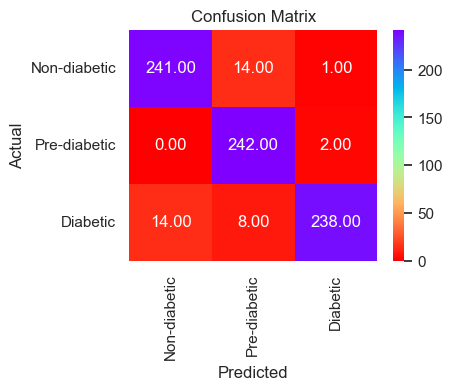

92.11% is the Cross Validation score
[('Accuracy is', 0.9486842105263158), ('Cross Validation score is', 92.10523585737555), ('Precision is', 0.9504937502408696), ('Recall is', 0.9486842105263158), ('F1 Score is', 0.948644754361604)]


In [27]:
# Call ClassifyMetrics function with the appropriate arguments
metrics = ClassifyMetrics(SVC, X_test, y_test)
print(metrics)

##### Knearest Neigbor

In [28]:
# Defining KNeighbors Classifier
KNN= KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

# Fitting Random forest model
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       256
           1       0.97      1.00      0.99       244
           2       1.00      0.94      0.97       260

    accuracy                           0.98       760
   macro avg       0.98      0.98      0.98       760
weighted avg       0.98      0.98      0.98       760


Confusion Matrix:
[[256   0   0]
 [  0 244   0]
 [  8   7 245]]


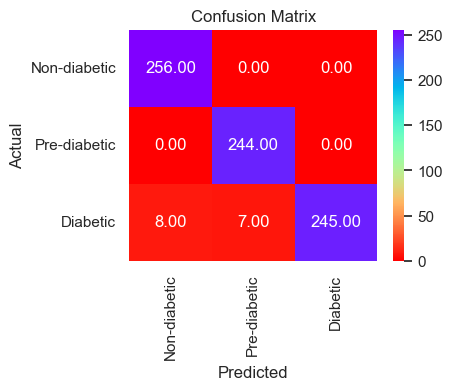

93.29% is the Cross Validation score
[('Accuracy is', 0.9802631578947368), ('Cross Validation score is', 93.28893176890438), ('Precision is', 0.9808390044288555), ('Recall is', 0.9802631578947368), ('F1 Score is', 0.980116133070797)]


In [29]:
# Call ClassifyMetrics function with the appropriate arguments
metrics = ClassifyMetrics(KNN, X_test, y_test)
print(metrics)

#### Comparing models

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Define your models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=1000)),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')),
    ('SVC', SVC(kernel='linear', C=1, degree=1, gamma=1, probability=True))
]

# Function to compare models
def compare_models(models, X, y):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for name, model in models:
        kfold = KFold(n_splits=3, random_state=1, shuffle=True)
        cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Cross Validation Mean': cv_scores.mean(),
            'Accuracy': accuracy
        })
    return results

# Assuming X_train and y_train are your training features and labels
comparison_results = compare_models(models, X_train, y_train)

# Display comparison results
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)


                 Model  Cross Validation Mean  Accuracy
0        Random Forest               0.982146  0.983333
1  Logistic Regression               0.892856  0.904167
2                  KNN               0.912531  0.904167
3                  SVC               0.901788  0.904167


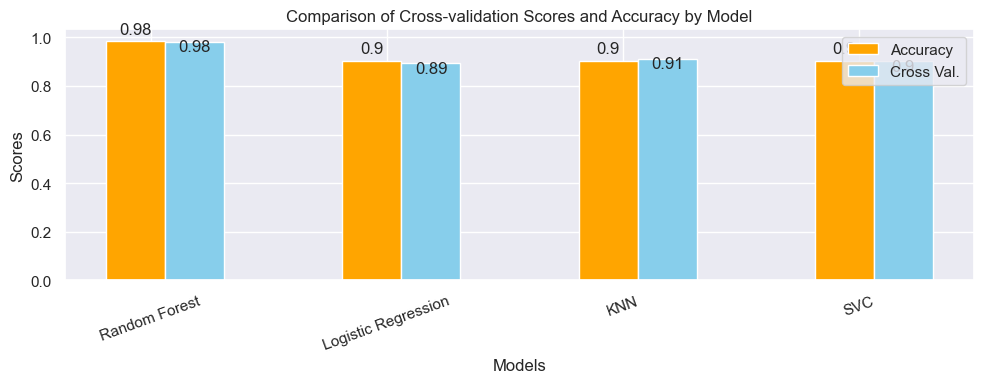

In [38]:
# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 4))

bar_width = 0.25
index = comparison_df.index

bar1 = ax.bar(index, comparison_df['Accuracy'], bar_width, label='Accuracy', color='orange')
bar2 = ax.bar(index + bar_width, comparison_df['Cross Validation Mean'], bar_width, label='Cross Val.', color='skyblue')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Cross-validation Scores and Accuracy by Model')
ax.set_xticks(index + bar_width / 4)
ax.set_xticklabels(comparison_df['Model'], rotation=20)
ax.legend()

# Displaying scores on top of the bars
for i, v in enumerate(comparison_df['Accuracy']):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

for i, v in enumerate(comparison_df['Cross Validation Mean']):
    plt.text(i + bar_width, v + 0.01, str(round(v, 2)), ha='center', va='top')

plt.tight_layout()
plt.show()

In [40]:
# Define your models
# Define your models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=1000)),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')),
    ('SVC', SVC(kernel='linear', C=1, degree=1, gamma=1, probability=True))
]

# Function to compare models
def compare_models(models, X_train, y_train, X_test, y_test, cv=5):
    results = []
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results.append({
            'Model': name,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    return results

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare models
comparison_results = compare_models(models, X_train, y_train, X_test, y_test)

# Display comparison results
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)


                 Model  Precision    Recall  F1 Score
0        Random Forest   0.986650  0.986667  0.986535
1  Logistic Regression   0.909826  0.923333  0.915413
2                  KNN   0.933532  0.916667  0.914970
3                  SVC   0.903594  0.930000  0.915784


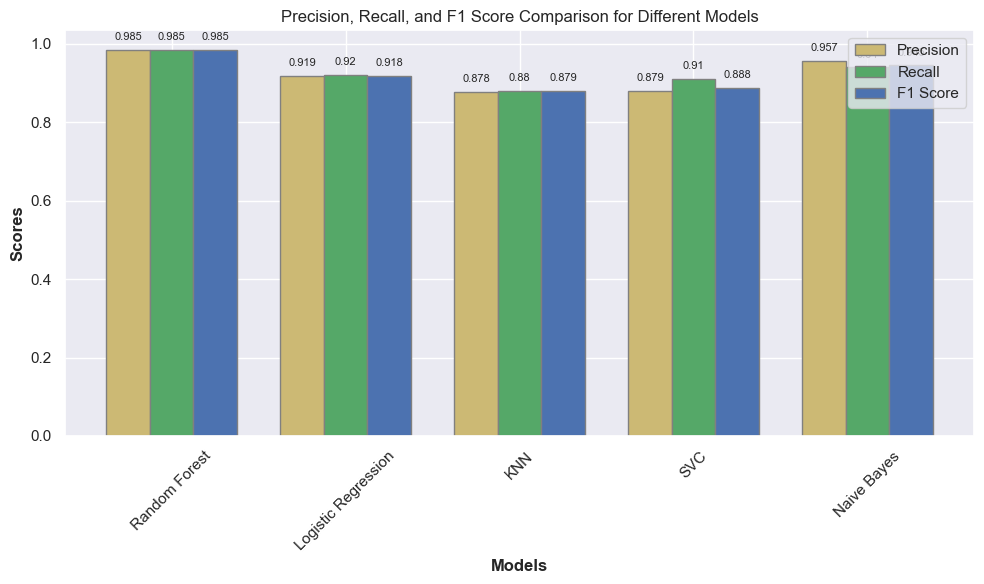

In [83]:
# Extracting data
model_names = comparison_df['Model']
precision_scores = comparison_df['Precision']
recall_scores = comparison_df['Recall']
f1_scores = comparison_df['F1 Score']

# Setting the positions for bars on X-axis
bar_width = 0.25
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the grouped bar plot
plt.figure(figsize=(10, 6))

bar1 = plt.bar(r1, precision_scores, color='y', width=bar_width, edgecolor='grey', label='Precision')
bar2 = plt.bar(r2, recall_scores, color='g', width=bar_width, edgecolor='grey', label='Recall')
bar3 = plt.bar(r3, f1_scores, color='b', width=bar_width, edgecolor='grey', label='F1 Score')

# Adding scores as annotations
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 3), ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=45)
plt.ylabel('Scores', fontweight='bold')
plt.title('Precision, Recall, and F1 Score Comparison for Different Models')

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()